In [1]:
from of_methods import *
import cv2
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Horn−Schunck Optical Flow')

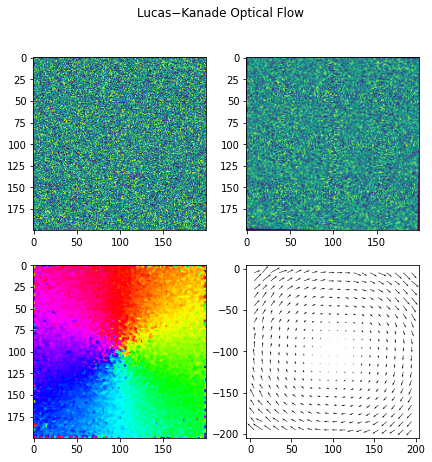

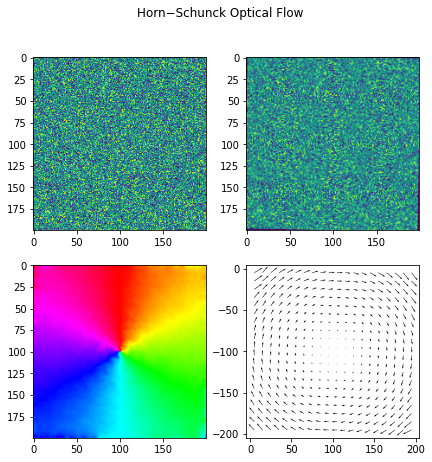

In [2]:
im1 = np.random.rand(200, 200).astype(np.float32)
im2 = im1.copy()
im2 = rotate_image(im2, -1)

U_lk, V_lk = lucaskanade(im1, im2, 3)
U_hs, V_hs = hornschunck(im1, im2, 300, 0.5)

fig1, ((ax1_11, ax1_12), (ax1_21, ax1_22)) = plt.subplots(2, 2, figsize=(7,7))
ax1_11.imshow(im1)
ax1_12.imshow(im2)
show_flow(U_lk, V_lk, ax1_21, type='angle')
show_flow(U_lk, V_lk, ax1_22, type='field', set_aspect=True)
fig1.suptitle('Lucas−Kanade Optical Flow')

fig2, ((ax2_11, ax2_12), (ax2_21, ax2_22)) = plt.subplots(2, 2, figsize=(7,7))
ax2_11.imshow(im1)
ax2_12.imshow(im2)
show_flow(U_hs, V_hs, ax2_21, type='angle')
show_flow(U_hs, V_hs, ax2_22, type='field', set_aspect=True)
fig2.suptitle('Horn−Schunck Optical Flow')

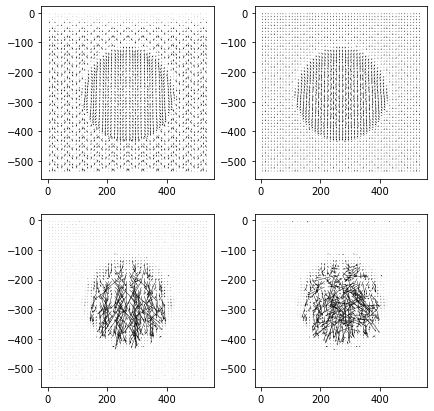

In [3]:
im1 = cv2.imread('other/sphere1.png', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('other/sphere2.png', cv2.IMREAD_GRAYSCALE)

U_lk , V_lk = hornschunck(im1, im2, 10, 0.5)
U2_lk , V2_lk = hornschunck(im1, im2, 300, 0.5)
U3_lk , V3_lk = hornschunck(im1, im2, 10, 0.00005)
U4_lk , V4_lk = hornschunck(im1, im2, 300, 0.00005)
fig1 , ((ax1_11, ax1_12), (ax1_21, ax1_22)) = plt.subplots(2, 2, figsize=(7,7))
show_flow(U_lk, V_lk, ax1_11, type='field', set_aspect=True)
show_flow(U2_lk, V2_lk, ax1_12, type='field', set_aspect=True)
show_flow(U3_lk, V3_lk, ax1_21, type='field', set_aspect=True)
show_flow(U4_lk, V4_lk, ax1_22, type='field', set_aspect=True)
plt.show()

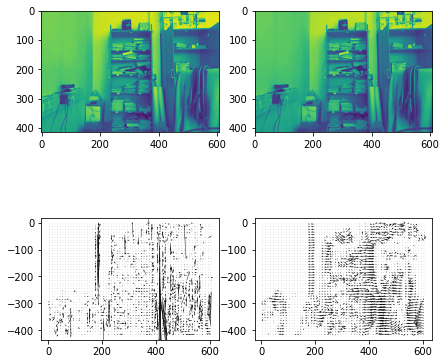

In [4]:
im1 = cv2.imread('disparity/office2_left.png', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('disparity/office2_right.png', cv2.IMREAD_GRAYSCALE)

U_lk, V_lk = lucaskanade(im1, im2, 5)
U_hs, V_hs = hornschunck(im1, im2, 200, 0.5)

fig1, ((ax1_11, ax1_12), (ax1_21, ax1_22)) = plt.subplots(2, 2, figsize=(7,7))
ax1_11.imshow(im1)
ax1_12.imshow(im2)
show_flow(U_lk, V_lk, ax1_21, type='field', set_aspect=True)
show_flow(U_hs, V_hs, ax1_22, type='field', set_aspect=True)

plt.show()

3.635108470916748
0.1727888584136963
0.06608843803405762
34.249309062957764
7.877306699752808
1.4241223335266113


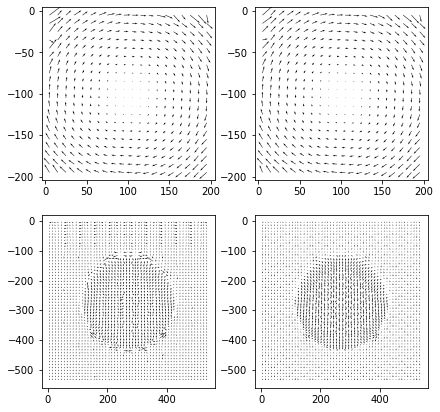

In [5]:
import time

im1 = np.random.rand(200, 200).astype(np.float32)
im2 = im1.copy()
im2 = rotate_image(im2, -1)

t = time.time()
Ur_lk, Vr_lk = hornschunck(im1, im2, 1000, 0.5)
print(time.time() - t)
t = time.time()
Ur_hs, Vr_hs = hornschunck_LK(im1, im2, 10, 30, 0.5)
print(time.time() - t)

t = time.time()
ur2, vr2 = lucaskanade(im1, im2, 10)
print(time.time() - t)

im1 = cv2.imread('other/sphere1.png', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('other/sphere2.png', cv2.IMREAD_GRAYSCALE)

t = time.time()
U_lk, V_lk = hornschunck(im1, im2, 1000, 0.5)
print(time.time() - t)
t = time.time()
U_hs, V_hs = hornschunck_LK(im1, im2, 20, 200, 0.5)
print(time.time() - t)
t = time.time()
u2, v2 = lucaskanade(im1, im2, 20)
print(time.time() - t)

fig1, ((ax1_11, ax1_12), (ax1_21, ax1_22)) = plt.subplots(2, 2, figsize=(7,7))
show_flow(ur2, vr2, ax1_11, type='field', set_aspect=True)
show_flow(Ur_hs, Vr_hs, ax1_12, type='field', set_aspect=True)
show_flow(u2, v2, ax1_21, type='field', set_aspect=True)
show_flow(U_hs, V_hs, ax1_22, type='field', set_aspect=True)
# fig1.suptitle('Lucas−Kanade Optical Flow')

# fig2, ((ax2_11, ax2_12), (ax2_21, ax2_22)) = plt.subplots(2, 2, figsize=(7,7))
# ax2_11.imshow(im1)
# ax2_12.imshow(im2)
# show_flow(U_hs, V_hs, ax2_21, type='angle')
# show_flow(U_hs, V_hs, ax2_22, type='field', set_aspect=True)
# fig2.suptitle('Horn−Schunck Optical Flow')

plt.show()

In [ ]:
# im1 = cv2.imread('other/walking465.tif', cv2.IMREAD_GRAYSCALE)
# im2 = cv2.imread('other/walking468.tif', cv2.IMREAD_GRAYSCALE)

im1 = cv2.imread('other/sphere1.png', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('other/sphere2.png', cv2.IMREAD_GRAYSCALE)

t = time.time()
u,v = pyramidal_lucaskanade(im1, im2, 15, 2)
print(time.time() - t)
t = time.time()
u2, v2 = lucaskanade(im1, im2, 15)
print(time.time() - t)
fig1 , ((ax1_11, ax1_12), (ax1_21, ax1_22)) = plt.subplots(2, 2, figsize=(7,7))
ax1_11.imshow(im1)
ax1_12.imshow(im2)
show_flow(u2, v2, ax1_21, type='field', set_aspect=True)
show_flow(u, v, ax1_22, type='field', set_aspect=True)

plt.show()

1.136894941329956
0.902052640914917
